<a href="https://colab.research.google.com/github/sentencebird/chatgpt-pokemon/blob/main/chatgpt_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [42]:
!pip install openai japanize-matplotlib --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 6.9 MB/s eta 0:00:00


In [ ]:
# https://beta.openai.com/account/api-keys
API_KEY = 

In [ ]:
import openai

openai.api_key = API_KEY

In [43]:
from tqdm.notebook import tqdm
import pandas as pd
import json
import time
import re
import japanize_matplotlib
import matplotlib.pyplot as plt
import collections

In [ ]:
pokemons = """フシギダネ
フシギソウ
フシギバナ
ヒトカゲ
リザード
リザードン
ゼニガメ
カメール
カメックス
キャタピー
トランセル
バタフリー
ビードル
コクーン
スピアー
ポッポ
ピジョン
ピジョット
コラッタ
ラッタ
オニスズメ
オニドリル
アーボ
アーボック
ピカチュウ
ライチュウ
サンド
サンドパン
ニドラン♀
ニドリーナ
ニドクイン
ニドラン♂
ニドリーノ
ニドキング
ピッピ
ピクシー
ロコン
キュウコン
プリン
プクリン
ズバット
ゴルバット
ナゾノクサ
クサイハナ
ラフレシア
パラス
パラセクト
コンパン
モルフォン
ディグダ
ダグトリオ
ニャース
ペルシアン
コダック
ゴルダック
マンキー
オコリザル
ガーディ
ウインディ
ニョロモ
ニョロゾ
ニョロボン
ケーシィ
ユンゲラー
フーディン
ワンリキー
ゴーリキー
カイリキー
マダツボミ
ウツドン
ウツボット
メノクラゲ
ドククラゲ
イシツブテ
ゴローン
ゴローニャ
ポニータ
ギャロップ
ヤドン
ヤドラン
コイル
レアコイル
カモネギ
ドードー
ドードリオ
パウワウ
ジュゴン
ベトベター
ベトベトン
シェルダー
パルシェン
ゴース
ゴースト
ゲンガー
イワーク
スリープ
スリーパー
クラブ
キングラー
ビリリダマ
マルマイン
タマタマ
ナッシー
カラカラ
ガラガラ
サワムラー
エビワラー
ベロリンガ
ドガース
マタドガス
サイホーン
サイドン
ラッキー
モンジャラ
ガルーラ
タッツー
シードラ
トサキント
アズマオウ
ヒトデマン
スターミー
バリヤード
ストライク
ルージュラ
エレブー
ブーバー
カイロス
ケンタロス
コイキング
ギャラドス
ラプラス
メタモン
イーブイ
シャワーズ
サンダース
ブースター
ポリゴン
オムナイト
オムスター
カブト
カブトプス
プテラ
カビゴン
フリーザー
サンダー
ファイヤー
ミニリュウ
ハクリュー
カイリュー
ミュウツー
ミュウ""".splitlines()

In [ ]:
def request_query(query):
    return openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    temperature=0,
    messages=[
            {"role": "user", "content": query},
        ],
    )

In [ ]:
responses_by_pokemon = {}
for pokemon in tqdm(pokemons):
    try:
    res = request_query(f"「{pokemon}」という生物の生態を説明してください")
    except:
        time.sleep(60)
        print(pokemon)
        res = request_query(f"「{pokemon}」という生物の生態を説明してください")
    responses_by_pokemon[pokemon] = res

  0%|          | 0/151 [00:00<?, ?it/s]

フシギソウ
ヒトカゲ
コイキング


In [ ]:
json.dump(responses_by_pokemon, open("gdrive/MyDrive/chatgpt-pokemon-res.json", "w"))

In [ ]:
responses_by_pokemon = json.load(open("gdrive/MyDrive/chatgpt-pokemon-res.json", "r"))
pd.DataFrame([{"name": k, "response": v["choices"][0]["message"]["content"]} for k, v in responses_by_pokemon.items()]).to_csv("gdrive/MyDrive/chatgpt-pokemon-name-explanations.csv")

In [ ]:
df

,Unnamed: 0,name,response
0,0,フシギダネ,フシギダネは、ポケットモンスターシリーズに登場する草タイプのポケモンです。体長は約0.7メー...
1,1,フシギソウ,フシギソウは、日本原産の多年草で、高さは30〜60cm程度になります。茎は直立し、葉は細長く...
2,2,フシギバナ,フシギバナは、着生植物の一種で、主に熱帯地域に生息しています。茎や葉には、空気中の水分や栄養...
3,3,ヒトカゲ,ヒトカゲは、火を操ることができるポケモンの一種です。体長は約60cmほどで、尾の先には炎が灯...
4,4,リザード,"「リザード」という言葉は、爬虫類の一種であるトカゲを指します。トカゲは、世界中に約6,000..."
...,...,...,...
146,146,ミニリュウ,ミニリュウは、ポケットモンスターシリーズに登場する架空の生物です。その生態は以下の通りです。...
147,147,ハクリュー,「ハクリュー」という生物は、日本に生息する両生類の一種です。体長は最大で約20cm程度で、体...
148,148,カイリュー,カイリューは、ドラゴンタイプのポケモンで、四肢を持つ爬虫類のような外見をしています。彼らは、...
149,149,ミュウツー,ミュウツーは、ポケットモンスターシリーズに登場する架空の生物です。外見は、紫色の体毛を持ち、...


In [5]:
df = pd.read_csv("gdrive/MyDrive/chatgpt-pokemon-name-explanations.csv")

identified_pokemons = []
not_identified_pokemons = []
for i, row in df.iterrows():
    if re.search("ポケモン|ポケットモンスター", row["response"]):
        identified_pokemons.append(row["name"])
    else:
        not_identified_pokemons.append(row["name"])

In [15]:
for n in not_identified_pokemons:
    print(n)

フシギソウ
フシギバナ
リザード
ゼニガメ
カメール
トランセル
バタフリー
ビードル
コクーン
スピアー
ポッポ
ピジョン
コラッタ
ラッタ
オニスズメ
オニドリル
ライチュウ
サンド
サンドパン
ピクシー
キュウコン
プリン
ズバット
ナゾノクサ
クサイハナ
ラフレシア
パラス
コンパン
モルフォン
ペルシアン
コダック
オコリザル
ニョロモ
ニョロゾ
ニョロボン
ユンゲラー
フーディン
ゴーリキー
マダツボミ
ウツドン
ウツボット
メノクラゲ
ドククラゲ
イシツブテ
ギャロップ
ヤドン
ヤドラン
コイル
カモネギ
ドードー
パウワウ
ジュゴン
ベトベター
ベトベトン
シェルダー
パルシェン
ゴース
ゴースト
スリープ
スリーパー
クラブ
ビリリダマ
マルマイン
タマタマ
ナッシー
カラカラ
ガラガラ
サワムラー
エビワラー
ベロリンガ
ドガース
マタドガス
モンジャラ
ガルーラ
タッツー
シードラ
トサキント
アズマオウ
ヒトデマン
スターミー
ストライク
ルージュラ
ブーバー
カイロス
ケンタロス
コイキング
ラプラス
サンダース
ブースター
オムナイト
オムスター
カブト
カブトプス
プテラ
フリーザー
サンダー
ファイヤー
ハクリュー


In [6]:
identified_pokemons, len(identified_pokemons)

(['フシギダネ',
  'ヒトカゲ',
  'リザードン',
  'カメックス',
  'キャタピー',
  'ピジョット',
  'アーボ',
  'アーボック',
  'ピカチュウ',
  'ニドラン♀',
  'ニドリーナ',
  'ニドクイン',
  'ニドラン♂',
  'ニドリーノ',
  'ニドキング',
  'ピッピ',
  'ロコン',
  'プクリン',
  'ゴルバット',
  'パラセクト',
  'ディグダ',
  'ダグトリオ',
  'ニャース',
  'ゴルダック',
  'マンキー',
  'ガーディ',
  'ウインディ',
  'ケーシィ',
  'ワンリキー',
  'カイリキー',
  'ゴローン',
  'ゴローニャ',
  'ポニータ',
  'レアコイル',
  'ドードリオ',
  'ゲンガー',
  'イワーク',
  'キングラー',
  'サイホーン',
  'サイドン',
  'ラッキー',
  'バリヤード',
  'エレブー',
  'ギャラドス',
  'メタモン',
  'イーブイ',
  'シャワーズ',
  'ポリゴン',
  'カビゴン',
  'ミニリュウ',
  'カイリュー',
  'ミュウツー',
  'ミュウ'],
 53)

In [7]:
not_identified_pokemons, len(not_identified_pokemons)

(['フシギソウ',
  'フシギバナ',
  'リザード',
  'ゼニガメ',
  'カメール',
  'トランセル',
  'バタフリー',
  'ビードル',
  'コクーン',
  'スピアー',
  'ポッポ',
  'ピジョン',
  'コラッタ',
  'ラッタ',
  'オニスズメ',
  'オニドリル',
  'ライチュウ',
  'サンド',
  'サンドパン',
  'ピクシー',
  'キュウコン',
  'プリン',
  'ズバット',
  'ナゾノクサ',
  'クサイハナ',
  'ラフレシア',
  'パラス',
  'コンパン',
  'モルフォン',
  'ペルシアン',
  'コダック',
  'オコリザル',
  'ニョロモ',
  'ニョロゾ',
  'ニョロボン',
  'ユンゲラー',
  'フーディン',
  'ゴーリキー',
  'マダツボミ',
  'ウツドン',
  'ウツボット',
  'メノクラゲ',
  'ドククラゲ',
  'イシツブテ',
  'ギャロップ',
  'ヤドン',
  'ヤドラン',
  'コイル',
  'カモネギ',
  'ドードー',
  'パウワウ',
  'ジュゴン',
  'ベトベター',
  'ベトベトン',
  'シェルダー',
  'パルシェン',
  'ゴース',
  'ゴースト',
  'スリープ',
  'スリーパー',
  'クラブ',
  'ビリリダマ',
  'マルマイン',
  'タマタマ',
  'ナッシー',
  'カラカラ',
  'ガラガラ',
  'サワムラー',
  'エビワラー',
  'ベロリンガ',
  'ドガース',
  'マタドガス',
  'モンジャラ',
  'ガルーラ',
  'タッツー',
  'シードラ',
  'トサキント',
  'アズマオウ',
  'ヒトデマン',
  'スターミー',
  'ストライク',
  'ルージュラ',
  'ブーバー',
  'カイロス',
  'ケンタロス',
  'コイキング',
  'ラプラス',
  'サンダース',
  'ブースター',
  'オムナイト',
  'オムスター',
  'カブト',
  'カブトプス',
  'プテラ',
  'フリーザー',
  'サンダー',


In [12]:
df["is_identified"] = [name in identified_pokemons for name in df["name"]]
df.to_csv("gdrive/MyDrive/chatgpt-pokemon-name-explanations.csv", index=False)

In [17]:
open("pokemon_types.tsv", "w").write("""フシギダネ	くさ	どく
フシギソウ	くさ	どく
フシギバナ	くさ	どく
ヒトカゲ	ほのお	
リザード	ほのお	
リザードン	ほのお	ひこう
ゼニガメ	みず	
カメール	みず	
カメックス	みず	
キャタピー	むし	
トランセル	むし	
バタフリー	むし	ひこう
ビードル	むし	どく
コクーン	むし	どく
スピアー	むし	どく
ポッポ	ノーマル	ひこう
ピジョン	ノーマル	ひこう
ピジョット	ノーマル	ひこう
コラッタ	ノーマル	
ラッタ	ノーマル	
オニスズメ	ノーマル	ひこう
オニドリル	ノーマル	ひこう
アーボ	どく	
アーボック	どく	
ピカチュウ	でんき	
ライチュウ	でんき	
サンド	じめん	
サンドパン	じめん	
ニドラン♀	どく	
ニドリーナ	どく	
ニドクイン	どく	じめん
ニドラン♂	どく	
ニドリーノ	どく	
ニドキング	どく	じめん
ピッピ	ノーマル	
ピクシー	ノーマル	
ロコン	ほのお	
キュウコン	ほのお	
プリン	ノーマル	
プクリン	ノーマル	
ズバット	どく	ひこう
ゴルバット	どく	ひこう
ナゾノクサ	くさ	どく
クサイハナ	くさ	どく
ラフレシア	くさ	どく
パラス	むし	くさ
パラセクト	むし	くさ
コンパン	むし	どく
モルフォン	むし	どく
ディグダ	じめん	
ダグトリオ	じめん	
ニャース	ノーマル	
ペルシアン	ノーマル	
コダック	みず	
ゴルダック	みず	
マンキー	かくとう	
オコリザル	かくとう	
ガーディ	ほのお	
ウインディ	ほのお	
ニョロモ	みず	
ニョロゾ	みず	
ニョロボン	みず	かくとう
ケーシィ	エスパー	
ユンゲラー	エスパー	
フーディン	エスパー	
ワンリキー	かくとう	
ゴーリキー	かくとう	
カイリキー	かくとう	
マダツボミ	くさ	どく
ウツドン	くさ	どく
ウツボット	くさ	どく
メノクラゲ	みず	どく
ドククラゲ	みず	どく
イシツブテ	いわ	じめん
ゴローン	いわ	じめん
ゴローニャ	いわ	じめん
ポニータ	ほのお	
ギャロップ	ほのお	
ヤドン	みず	エスパー
ヤドラン	みず	エスパー
コイル	でんき	
レアコイル	でんき	
カモネギ	ノーマル	ひこう
ドードー	ノーマル	ひこう
ドードリオ	ノーマル	ひこう
パウワウ	みず	
ジュゴン	みず	こおり
ベトベター	どく	
ベトベトン	どく	
シェルダー	みず	
パルシェン	みず	こおり
ゴース	ゴースト	どく
ゴースト	ゴースト	どく
ゲンガー	ゴースト	どく
イワーク	いわ	じめん
スリープ	エスパー	
スリーパー	エスパー	
クラブ	みず	
キングラー	みず	
ビリリダマ	でんき	
マルマイン	でんき	
タマタマ	くさ	
ナッシー	くさ	エスパー
カラカラ	じめん	
ガラガラ	じめん	
サワムラー	かくとう	
エビワラー	かくとう	
ベロリンガ	ノーマル	
ドガース	どく	
マタドガス	どく	
サイホーン	いわ	じめん
サイドン	いわ	じめん
ラッキー	ノーマル	
モンジャラ	くさ	
ガルーラ	ノーマル	
タッツー	みず	
シードラ	みず	
トサキント	みず	
アズマオウ	みず	
ヒトデマン	みず	
スターミー	みず	エスパー
バリヤード	エスパー	
ストライク	むし	ひこう
ルージュラ	こおり	
エレブー	でんき	
ブーバー	ほのお	
カイロス	むし	
ケンタロス	ノーマル	
コイキング	みず	
ギャラドス	みず	ひこう
ラプラス	みず	こおり
メタモン	ノーマル	
イーブイ	ノーマル	
シャワーズ	みず	
サンダース	でんき	
ブースター	ほのお	
ポリゴン	ノーマル	
オムナイト	みず	いわ
オムスター	みず	いわ
カブト	みず	いわ
カブトプス	みず	いわ
プテラ	いわ	ひこう
カビゴン	ノーマル	
フリーザー	こおり	ひこう
サンダー	でんき	ひこう
ファイヤー	ほのお	ひこう
ミニリュウ	ドラゴン	
ハクリュー	ドラゴン	
カイリュー	ドラゴン	ひこう
ミュウツー	エスパー	
ミュウ	エスパー	""")

1706

In [31]:
types_by_pokemon_name = {}
df_types = pd.read_csv("pokemon_types.tsv", delimiter="\t", header=None)
for i, row in df_types.iterrows():
    if pd.isna(row[2]):
        types_by_pokemon_name[row[0]] = [row[1]]
    else:
        types_by_pokemon_name[row[0]] = [row[1], row[2]]

In [57]:
identified_types = []
for name in identified_pokemons:
    identified_types += types_by_pokemon_name[name]

In [58]:
not_identified_types = []
for name in not_identified_pokemons:
    not_identified_types += types_by_pokemon_name[name]

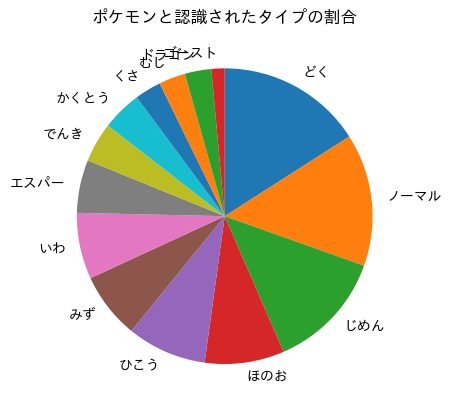

In [78]:
counter = dict(sorted(collections.Counter(identified_types).items(), key=lambda x:x[1], reverse=True))
x = counter.values()
labels = counter.keys()
plt.pie(x, labels=labels, counterclock=False, startangle=90)
plt.title("ポケモンと認識されたタイプの割合")
plt.show()

In [81]:
identified_labels = list(labels)

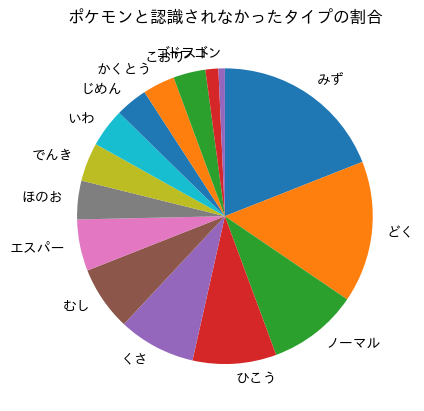

In [59]:
counter = dict(sorted(collections.Counter(not_identified_types).items(), key=lambda x:x[1], reverse=True))
x = counter.values()
labels = counter.keys()
plt.pie(x, labels=labels, counterclock=False, startangle=90)
plt.title("ポケモンと認識されなかったタイプの割合")
plt.show()

In [62]:
indentified_cnts_by_type = {}
not_indentified_cnts_by_type = {}
for name, types in types_by_pokemon_name.items():
    is_identified = name in identified_pokemons
    for type_ in types:
        if is_identified:
            indentified_cnts_by_type.setdefault(type_, 0)
            indentified_cnts_by_type[type_] += 1
        else:
            not_indentified_cnts_by_type.setdefault(type_, 0)
            not_indentified_cnts_by_type[type_] += 1            

In [105]:
types = list(set(identified_labels) | set(not_indentified_cnts_by_type.keys()))

In [109]:
types = identified_labels + list(set(not_indentified_cnts_by_type.keys()) - set(identified_labels))

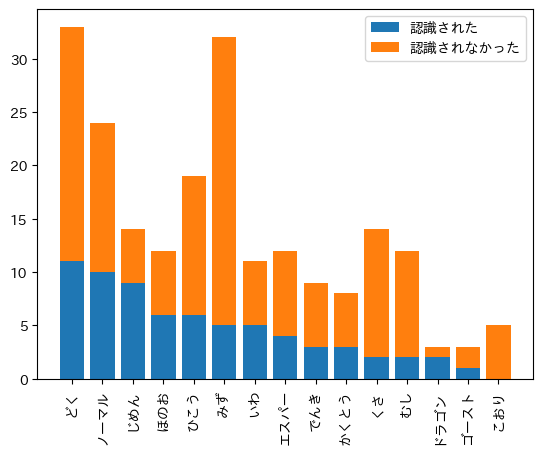

In [110]:
h1 = [indentified_cnts_by_type.get(type_, 0) for type_ in types]
h2 = [not_indentified_cnts_by_type.get(type_, 0) for type_ in types]
p1 = plt.bar(list(range(len(types))), h1)
p2 = plt.bar(list(range(len(types))), h2, bottom=h1)
plt.legend((p1[0], p2[0]), ("認識された", "認識されなかった"))
plt.xticks(list(range(len(types))), types, rotation=90)
plt.show()